In [4]:
import  pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from pandas_datareader import DataReader

In [5]:
from datetime import datetime

In [6]:
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

In [7]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, "yahoo", start, end)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,77.273962,75.425563,76.232599,76.465000,1.474270e+08,76.121016
std,17.525772,17.093302,17.269487,17.348723,7.140399e+07,17.486583
min,51.744999,51.055000,51.607498,51.424999,1.332256e+07,50.919777
25%,65.110001,63.845001,64.315002,64.857498,1.008056e+08,64.413116
50%,74.470001,71.580002,72.482498,73.162498,1.281860e+08,72.833664
75%,81.805000,80.712502,81.112503,81.302498,1.701084e+08,81.133713
max,132.919998,131.130005,128.697495,131.229996,4.268848e+08,131.229996


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-09-03 to 2020-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


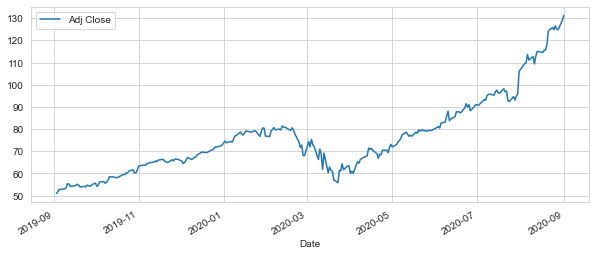

In [11]:
AAPL["Adj Close"].plot(legend=True, figsize=(10,4))

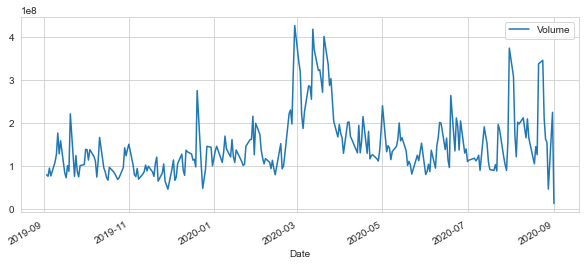

In [12]:
AAPL["Volume"].plot(legend=True, figsize=(10,4))

In [16]:
ma_day = [10,20,50]
for ma in ma_day:
    columun_name = "MA{}".format(ma)
    AAPL[columun_name] = AAPL["Adj Close"].rolling(window=ma).mean()

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA20,MA50
Date,,,,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.919777,NaN,NaN,NaN
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.783714,NaN,NaN,NaN
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.796162,NaN,NaN,NaN
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.791210,NaN,NaN,NaN
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,53.016479,NaN,NaN,NaN


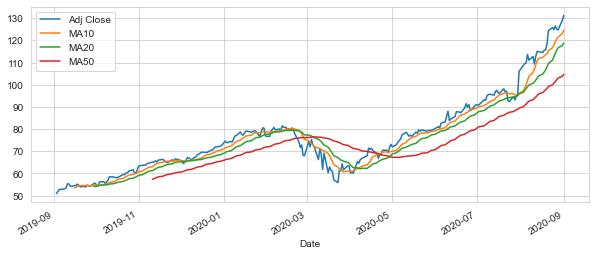

In [19]:
AAPL[["Adj Close", "MA10","MA20","MA50"]].plot(subplots=False, figsize=(10,4))

In [20]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

In [21]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA20,MA50,Daily Return
Date,,,,,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.919777,NaN,NaN,NaN,NaN
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.783714,NaN,NaN,NaN,0.016967
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.796162,NaN,NaN,NaN,0.019551
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.791210,NaN,NaN,NaN,-0.000094
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,53.016479,NaN,NaN,NaN,0.004267


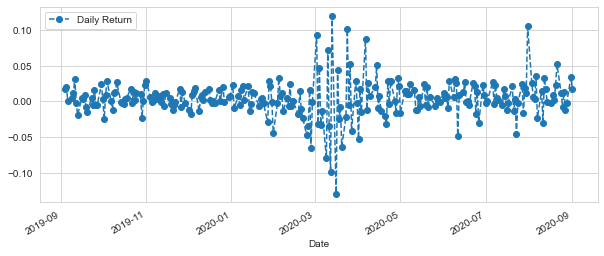

In [24]:
AAPL["Daily Return"].plot(figsize=(10,4), legend=True, linestyle="--", marker="o")

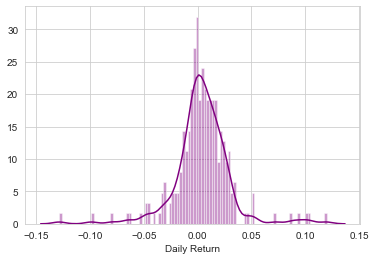

In [26]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")

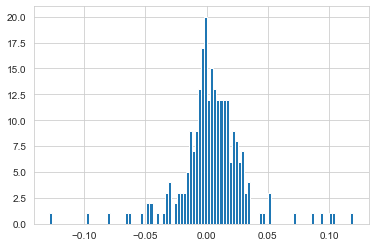

In [28]:
AAPL["Daily Return"].hist(bins=100)

In [30]:
closing_df= DataReader(["AAPL","GOOG", "MSFT", "AMZN"], "yahoo", start, end)["Adj Close"]

In [31]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-03,50.919777,1168.390015,134.508682,1789.839966
2019-09-04,51.783714,1181.410034,136.080795,1800.619995
2019-09-05,52.796162,1211.380005,138.473541,1840.719971
2019-09-06,52.791210,1204.930054,137.534241,1833.510010
2019-09-09,53.016479,1204.410034,135.972031,1831.349976


In [32]:
tech_rets = closing_df.pct_change()

In [33]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-03,NaN,NaN,NaN,NaN
2019-09-04,0.016967,0.011144,0.011688,0.006023
2019-09-05,0.019551,0.025368,0.017583,0.022270
2019-09-06,-0.000094,-0.005324,-0.006783,-0.003917
2019-09-09,0.004267,-0.000432,-0.011359,-0.001178


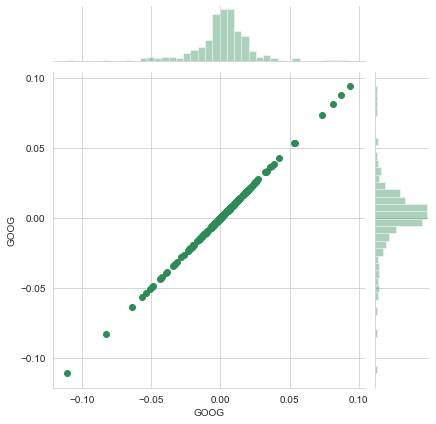

In [37]:
sns.jointplot("GOOG", "GOOG", tech_rets, kind="scatter", color="seagreen")

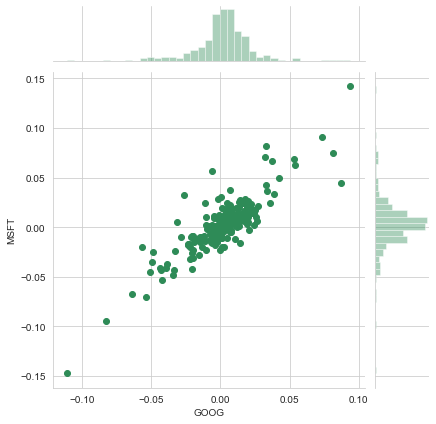

In [38]:
sns.jointplot("GOOG", "MSFT", tech_rets, kind="scatter", color="seagreen")

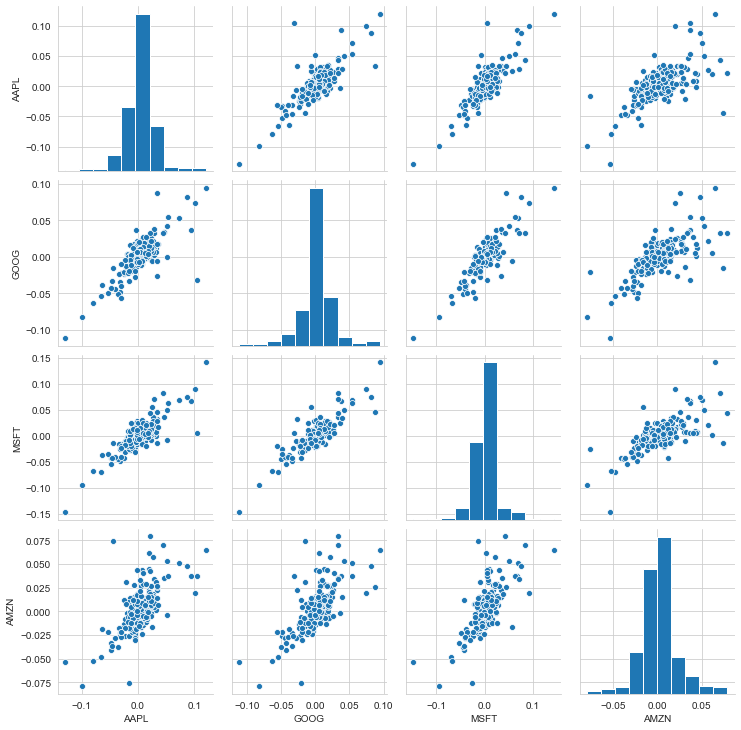

In [39]:
sns.pairplot(tech_rets.dropna())

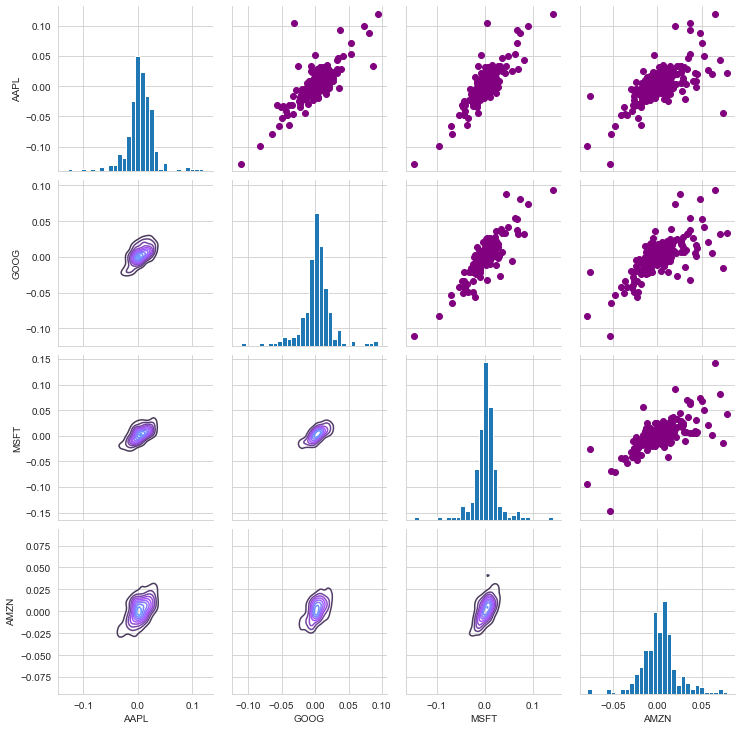

In [41]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

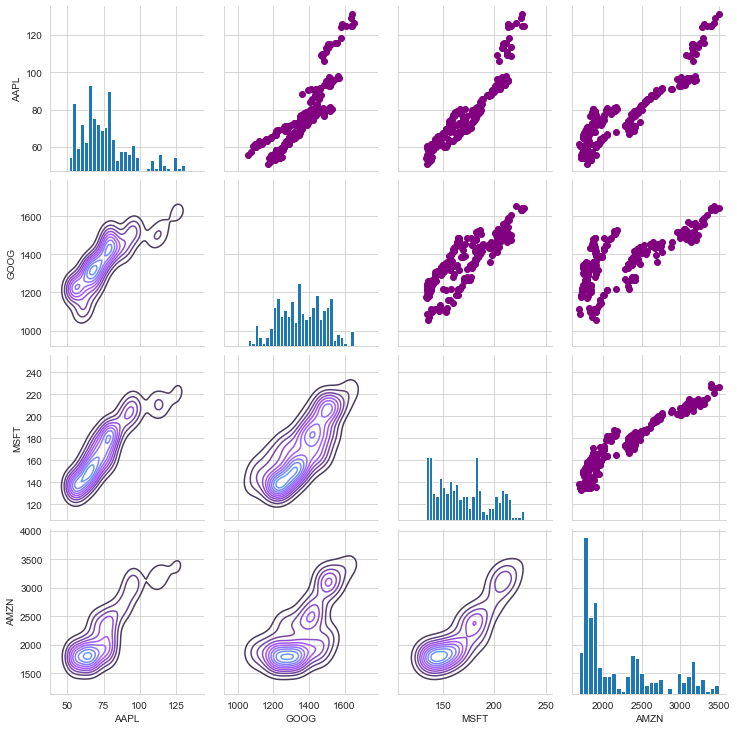

In [42]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

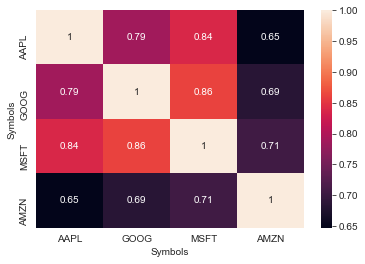

In [43]:
sns.heatmap(tech_rets.corr(), annot=True)

In [44]:
rets = tech_rets.dropna()

In [45]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-04,0.016967,0.011144,0.011688,0.006023
2019-09-05,0.019551,0.025368,0.017583,0.022270
2019-09-06,-0.000094,-0.005324,-0.006783,-0.003917
2019-09-09,0.004267,-0.000432,-0.011359,-0.001178
2019-09-10,0.011813,0.001320,-0.010471,-0.005897


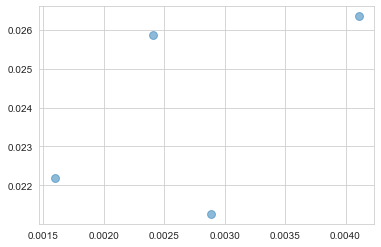

In [47]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

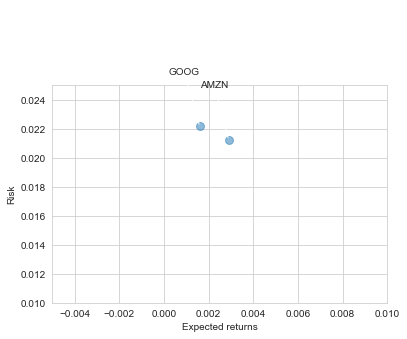

In [53]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005,0.01])

plt.xlabel("Expected returns")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()): 
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                 textcoords="offset points", ha="right", va="bottom",
                 arrowprops = dict(arrowstyle="-", connectionstyle="arc3"))